In [1]:
# importing basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
import nltk

In [3]:
# lets read the dataset
train =  pd.read_csv('train.csv', nrows=7000)

# lets check the shape of the dataset
train.shape

(7000, 2)

## 1. Count the number of words in each Review.

In [4]:
# word count in each review
train['word_count'] = train['text'].apply(lambda x: len(x.split()))
train.head(3)

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184


## 2. Calculate the Polarity of the Reviews

In [5]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
train['polarity'] = train['text'].apply(get_polarity)

train.head()

,text,label,word_count,polarity
0,I grew up (b. 1965) watching and loving the Th...,0,151,0.123287
1,"When I put this movie in my DVD player, and sa...",0,326,0.131345
2,Why do people who do not know what a particula...,0,184,-0.041369
3,Even though I have great interest in Biblical ...,0,69,-0.135714
4,Im a die hard Dads Army fan and nothing will e...,1,178,0.123256


## 3. Remove all the punctuations from the Reviews.

In [6]:
import string
# lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

train['text'] = train['text'].apply(punctuation_removal)

## 4. Remove all the numbers from the Reviews

In [7]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train['text'] = train['text'].apply(drop_numbers)

## 5. Convert all the words to lowercase and lemmatise them

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# for lemmatisation
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word.lower()) for word in text_tokens]
    return ' '.join(text_lemm)

train['text'] = train['text'].apply(lemmatise)

## 6. Remove all the stopwords from the Reviews

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
# for stopwords Removal
from nltk.corpus import stopwords
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

train['text'] = train['text'].apply(remove_stopword)

## 7. Convert textual data to numbers using TF-IDF representation

In [14]:
# TF-IDF representation
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 3000)

x = tf.fit_transform(train['text']).toarray()
y = train.iloc[:, 1].values

print(x.shape)
print(y.shape)

(7000, 3000)
(7000,)


## 8. Split the data into training and testing sets

In [15]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(4900, 3000)
(4900,)
(2100, 3000)
(2100,)


## 9. Make a Naive Bayes Classifier and evaluate it using Confusion matrix

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8771428571428571
Testing Accuracy : 0.7657142857142857


In [17]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[811, 247],
       [245, 797]], dtype=int64)

<AxesSubplot:>

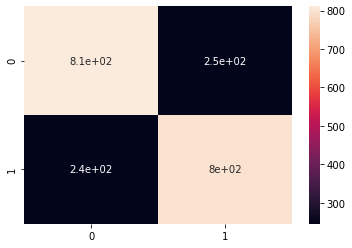

In [21]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True)